# Lab - Parallel Computing Part 3 - PyTorch Classifier Training
## E6692 Spring 2022


In this part we train from scratch a PyTorch CNN classifier to predict the value of handwritten MNIST digits. This is a classic machine learning task, so you've likely seen it before. We provide the data download, model definition, and training code, so running these cells should output an MNIST trained instance of the **utils.models.PyTorchClassifier** model with weights saved to **models/MNIST classification**. 

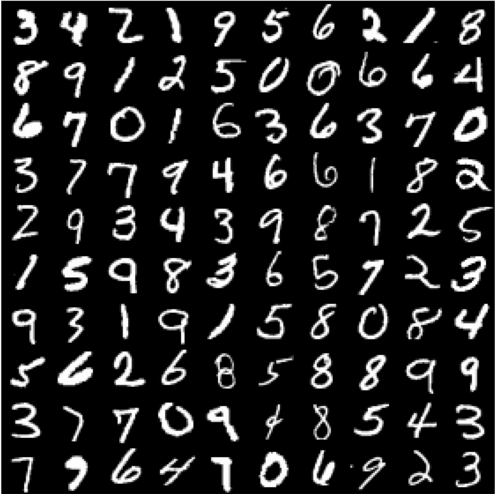

After you have generated the trained model, we will transfer its weight parameters to a model that uses the CUDA kernel function layers we implemented in Part 1. 

In [1]:
import os
import torch
import torchvision
import numpy as np

from utils.dataset import load_mnist_dataset, display_image, BATCH_SIZE, CLASSES
from utils.models import PyTorchClassifier
from utils.train import train, plot_loss_and_accuracy

device = torch.device('cuda')
print("GPU name: ", torch.cuda.get_device_name(0))

models_path = './models'
if not os.path.exists(models_path):
    os.makedirs(models_path)
    
model_save_path = os.path.join(models_path, 'MNIST classification')

%load_ext autoreload
%autoreload 2

%matplotlib inline

GPU name:  NVIDIA Tegra X1


In [2]:
training_set, validation_set = load_mnist_dataset()

# change the training and validation set sizes in utils/dataset.py
print("\nNumber of training images: ", int(len(training_set) * BATCH_SIZE), "shape: ", iter(training_set).next()[0][0].numpy().shape)
print("\nNumber of training images: ", int(len(validation_set) * BATCH_SIZE), "shape: ", iter(validation_set).next()[0][0].numpy().shape)


100.0%


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


102.8%


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw




100.0%


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



112.7%
/usr/local/lib/python3.6/dist-packages/torchvision-0.10.0a0+300a8a4-py3.6-linux-aarch64.egg/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /media/nvidia/NVME/pytorch/pytorch-v1.9.0/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw


Number of training images:  1000 shape:  (1, 28, 28)

Number of training images:  100 shape:  (1, 28, 28)


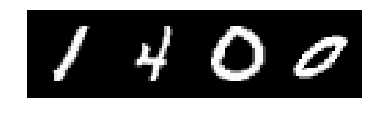

1     4     0     0    


In [3]:
sample_images, sample_labels = iter(training_set).next()
sample_images_grid = torchvision.utils.make_grid(sample_images)

display_image(sample_images_grid)
print(' '.join(f'{CLASSES[sample_labels[j]]:5s}' for j in range(BATCH_SIZE)))

In [4]:
model = PyTorchClassifier()
model.to(device) # transfer model to GPU


PyTorchClassifier(
  (conv1): Conv2d(1, 1, kernel_size=(5, 5), stride=(1, 1), padding=same, bias=False)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(1, 1, kernel_size=(5, 5), stride=(1, 1), padding=same, bias=False)
  (fc1): Linear(in_features=49, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [5]:
epochs = 10
optimizer = torch.optim.Adam(model.parameters())

train_loss, train_accuracy, val_loss, val_accuracy = train(model, device, training_set, 
                                                           validation_set, epochs, optimizer,
                                                           model_save_path)

Epoch: 1


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /media/nvidia/NVME/pytorch/pytorch-v1.9.0/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Saving model.
Training Loss: 0.5242	 Training Accuracy: 0.235
Validation Loss: 0.3036	 Validation Accuracy: 0.57
Epoch: 2
Saving model.
Training Loss: 0.218	 Training Accuracy: 0.716
Validation Loss: 0.1994	 Validation Accuracy: 0.72
Epoch: 3
Training Loss: 0.1464	 Training Accuracy: 0.813
Validation Loss: 0.1825	 Validation Accuracy: 0.7
Epoch: 4
Saving model.
Training Loss: 0.1237	 Training Accuracy: 0.837
Validation Loss: 0.1446	 Validation Accuracy: 0.79
Epoch: 5
Saving model.
Training Loss: 0.1068	 Training Accuracy: 0.853
Validation Loss: 0.1245	 Validation Accuracy: 0.84
Epoch: 6
Training Loss: 0.0955	 Training Accuracy: 0.875
Validation Loss: 0.1302	 Validation Accuracy: 0.81
Epoch: 7
Saving model.
Training Loss: 0.0857	 Training Accuracy: 0.878
Validation Loss: 0.1364	 Validation Accuracy: 0.86
Epoch: 8
Training Loss: 0.081	 Training Accuracy: 0.892
Validation Loss: 0.1185	 Validation Accuracy: 0.83
Epoch: 9
Training Loss: 0.0696	 Training Accuracy: 0.907
Validation Loss: 0.12

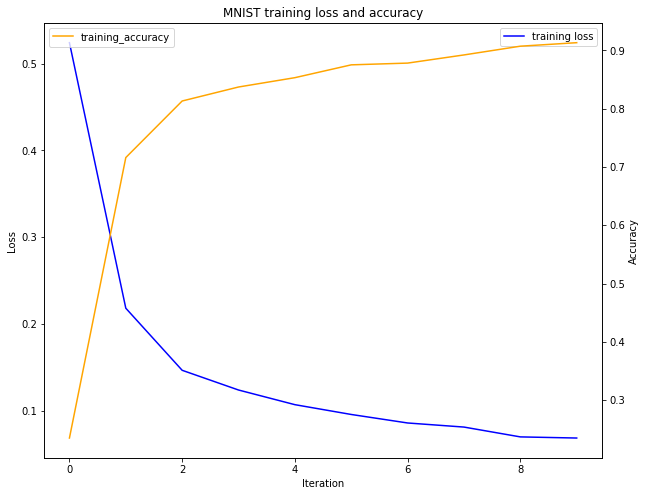

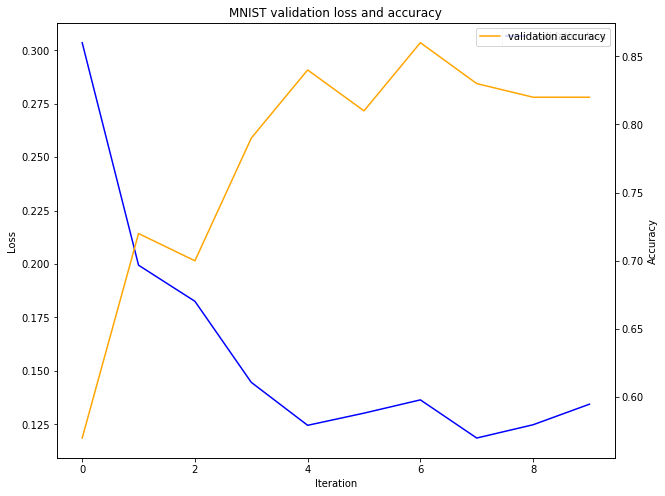

In [6]:
train_title = "MNIST training loss and accuracy"
train_labels = ["training loss", "training_accuracy"]
plot_loss_and_accuracy(train_loss, train_accuracy, train_title, train_labels)

val_title = "MNIST validation loss and accuracy"
val_labels = ["validation loss", "validation accuracy"]
plot_loss_and_accuracy(val_loss, val_accuracy, val_title, val_labels)